<a href="https://colab.research.google.com/github/mhammoud14/AutoLogin/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project : Car Evaluation

Name :
*   Nadine Jaafar


#**Introduction**


The car evaluation dataset is a critical repository containing information on various attributes and features of automobiles, serving as a valuable resource for machine learning projects. Exploring this dataset is pivotal as it enables the development and assessment of predictive models for car evaluation. Understanding the relationship between factors like price, safety, maintenance costs, and the overall acceptability of cars can significantly impact consumer decisions and the automotive industry as a whole. By delving into this dataset, one can uncover patterns, correlations, and predictive insights that contribute to better-informed decisions in car manufacturing, marketing strategies, and even policy-making related to transportation and safety standards. Studying this dataset for a machine learning project provides an opportunity to harness the power of data to enhance our understanding of car evaluation metrics, ultimately improving consumer experiences and industry practices.

For our machine learning project, we plan to implement both the Decision Tree Classifier and the Random Forest Classifier on the car evaluation dataset using Python. Our primary objective is to ascertain the superior predictive performance between these two models. To accomplish this, we will divide the dataset into training and test sets, a fundamental step in evaluating machine learning models. By training each classifier on the training data, we aim to capture the underlying patterns and relationships within the dataset. Subsequently, we will use the test set to assess and compare the predictive accuracy, precision, recall, and other performance metrics of both models. This approach will enable us to determine which classifier—Decision Tree or Random Forest—yields better results in predicting car evaluations, thereby aiding in selecting the most effective model for this specific dataset and task.

#**1. Collecting Data:**

 ## Import libraries

In [ ]:
# linear algebra
import numpy as np

# data processing, CSV file I/O
import pandas as pd

# for data visualization purposes
import matplotlib.pyplot as plt

# for data visualization
import seaborn as sns
%matplotlib inline


## Import dataset


In [ ]:
# This database was obtained from Kaggle
url = "https://raw.githubusercontent.com/nadinehjaafar/csc431/main/car_evaluation.csv"
df = pd.read_csv(url)

# View dimensions of dataset
print(df.shape)

# Preview the dataset
# View top 5 rows of dataset to make sure the data was imported correctly
df.head()

(1727, 7)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#**2. Preparing the Data:**

## Rename column names

We renamed the column names to words separated by underscores for easier access and code usage.

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.columns

# Preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Frequency distribution of values in variables

We will check the frequency counts of categorical variables.

In [ ]:
for var in df.columns:
    print(df[var].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


## Frequency distribution visualization

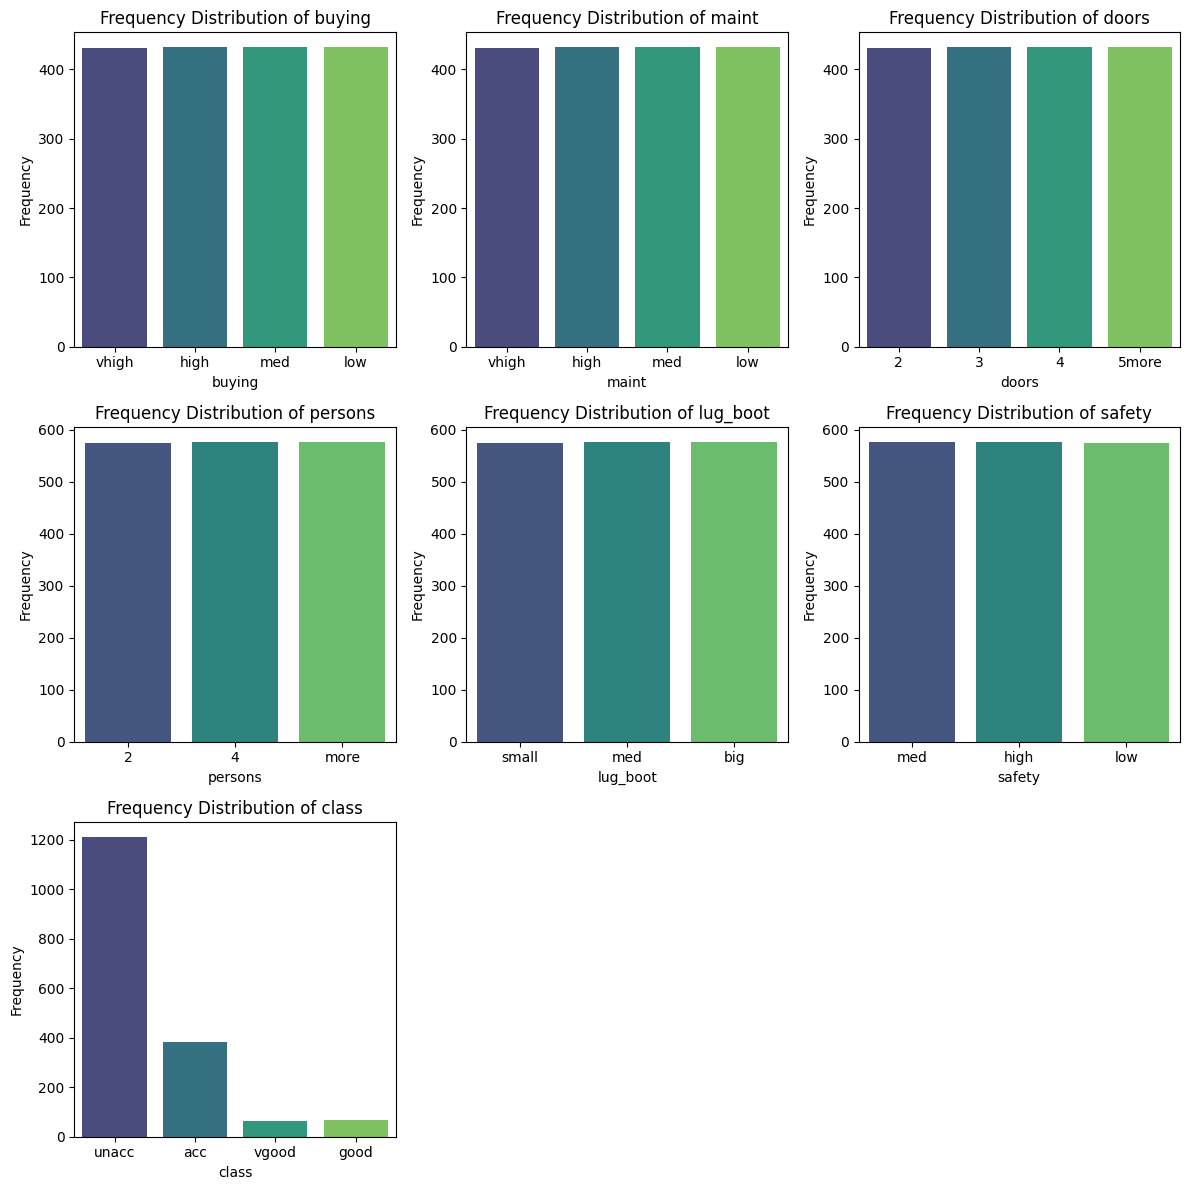

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
num_cols = df.shape[1]
num_rows = (num_cols + 2) // 3  # Corrected calculation for the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, num_rows * 4))

for i, var in enumerate(df.columns):
    row, col = divmod(i, 3)
    sns.countplot(x=var, data=df, palette='viridis', ax=axes[row, col])
    axes[row, col].set_title(f'Frequency Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

# Remove empty subplots
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

## Missing values in variables

In [ ]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. We have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.



## Explore class variable

In [ ]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

## Declare feature vector and target variable

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']


##Split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (570, 6))

## Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [ ]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

##Encode categorical variables


Now, I will encode the categorical variables.



In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


We can see that all the variables are ordinal categorical data type.

In [ ]:
# import category encoders
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


We now have training and test set ready for model building.




#**3. Choosing a Model: Decision Tree Classifier**

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.


#**4. Training the Model:**

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

#**5. Evaluating the Model:**

## Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

## Check accuracy score with criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


##Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.



In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7848


## Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


Here, the training-set accuracy score is 0.7848 while the test-set accuracy to be 0.8053. These two values are quite comparable. So, there is no sign of overfitting.

## Visualize decision-trees

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

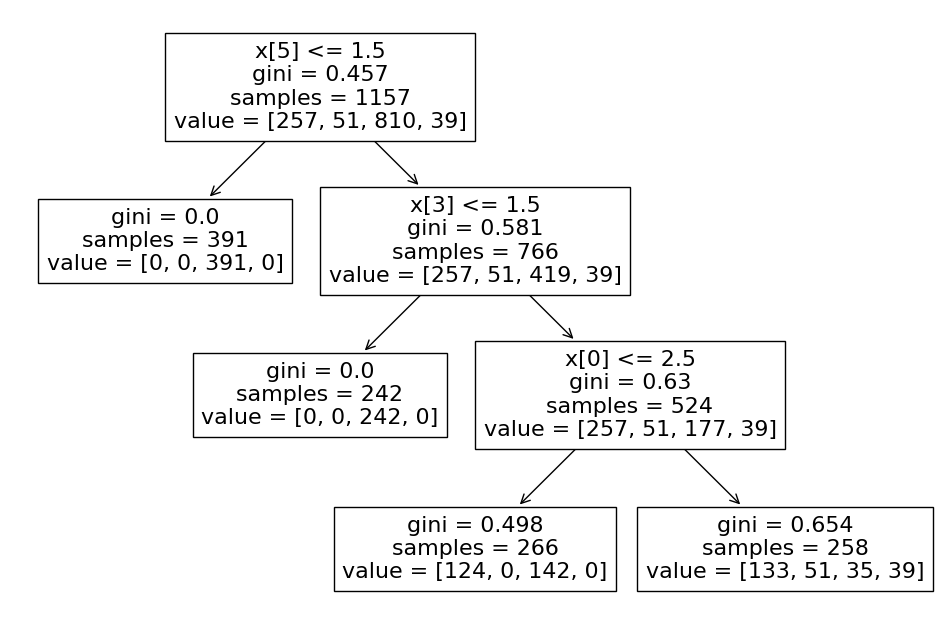

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

## Visualize decision-trees with graphviz

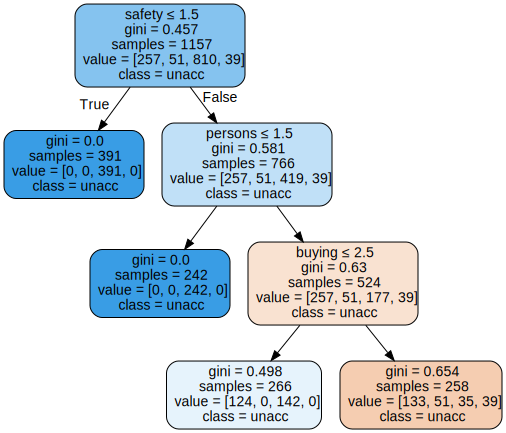

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

#**6. Parameter Tuning:**

We initially employed a Decision Tree Classifier using the Gini index as the criterion. Now, in the pursuit of optimizing our model's accuracy, we are making a strategic shift towards using the entropy criterion. This change aims to investigate whether utilizing entropy, an alternative measure of impurity, can potentially enhance the predictive performance of our Decision Tree Classifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## Predict the Test set results with criterion entropy

In [ ]:
y_pred_en = clf_en.predict(X_test)

## Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8053


## Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.



In [ ]:
y_pred_train_en = clf_en.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))


Training-set accuracy score: 0.7848


## Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7848 while the test-set accuracy to be 0.8053. These two values are quite comparable. So, there is no sign of overfitting.

## Visualize decision-trees

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

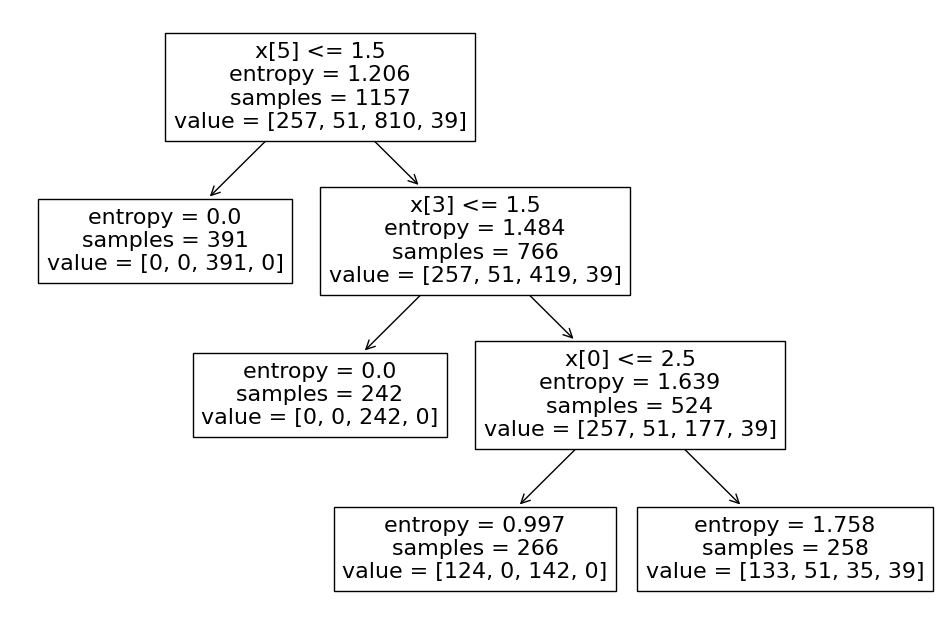

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

## Visualize decision-trees with graphviz

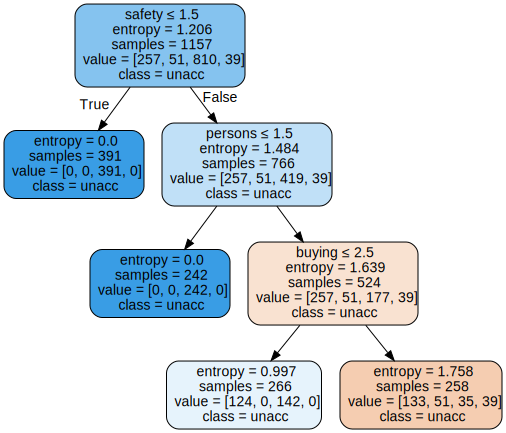

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

## Confusion matrix

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


##Confusion matrix visualization

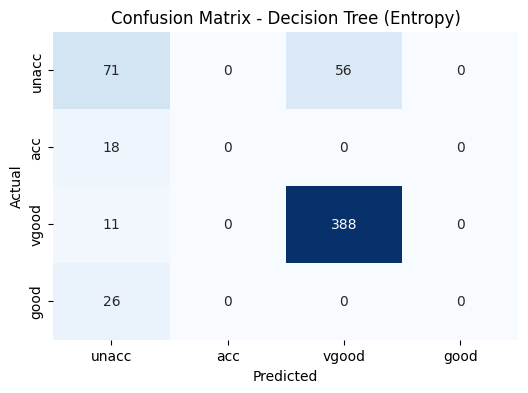

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming cm is the confusion matrix obtained using sklearn
cm = confusion_matrix(y_test, y_pred_en)

# Create a smaller heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.title('Confusion Matrix - Decision Tree (Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       127
        good       0.00      0.00      0.00        18
       unacc       0.87      0.97      0.92       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classification Report Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

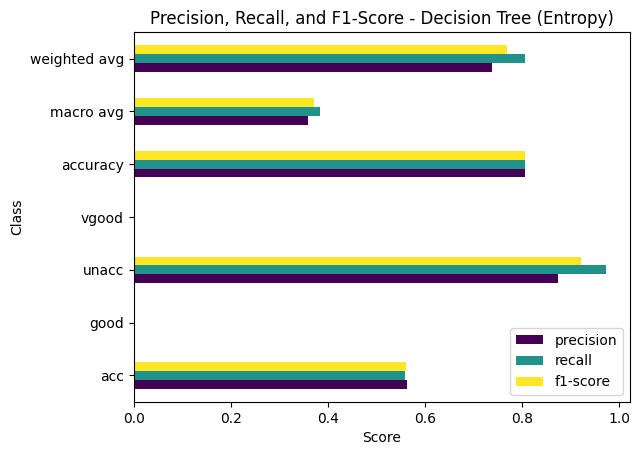

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test and y_pred_en are your true and predicted labels
classification_rep = classification_report(y_test, y_pred_en, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(8, 6))
classification_df[['precision', 'recall', 'f1-score']].plot(kind='barh', cmap='viridis')
plt.title('Precision, Recall, and F1-Score - Decision Tree (Entropy)')
plt.xlabel('Score')
plt.ylabel('Class')
plt.legend(loc='lower right')
plt.show()


#**7. Making Predictions**

In [ ]:
# Expected output is unacc
y_pred = clf_en.predict(X_test)[0]
y_pred

'unacc'

In [ ]:
# Expected output is acc
y_pred = clf_en.predict(X_test)[234]
y_pred

'acc'

Both predictions were accurate

#**8. Conclusion**

I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8053.

In the model with criterion gini index, the training-set accuracy score is 0.7848 while the test-set accuracy to be 0.8053. These two values are quite comparable. So, there is no sign of overfitting.

Similarly, in the model with criterion entropy, the training-set accuracy score is 0.7848 while the test-set accuracy to be 0.8053.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.

The confusion matrix and classification report yields very good model performance.

##After completing the Decision Tree Classifier (DTC) analysis, let's now implement the Random Forest Classifier (RFC) with enhanced feature engineering and a more structured approach. This step aims to leverage the collective strength of multiple decision trees within the Random Forest, anticipating improved accuracy and predictive capabilities for our car evaluation model.


##**3. Choosing a Model: Random Forest Classifier**

Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

##**4. Training The Model**

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0 )

# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

#**5. Evaluating the Model:**

## Predict the Test set results

In [ ]:
# Predict the Test set results
y_pred = rfc.predict(X_test)

## Check accuracy score

In [ ]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9474


## Visualize a tree from the random forest with graphviz

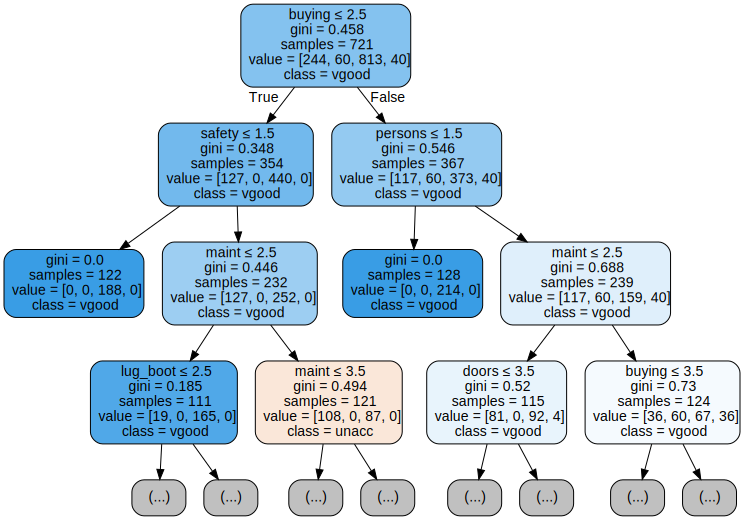

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

tree_index = 0

# Get the tree from the Random Forest
tree_to_visualize = rfc.estimators_[tree_index]

# Export the tree to graphviz format with max_depth set to 3
dot_data = export_graphviz(tree_to_visualize, out_file=None,
                           feature_names=X_train.columns,
                           class_names=df['class'].unique(),
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=3)  # Set max_depth to limit the depth of the visualization

# Create a graph from the graphviz format
graph = graphviz.Source(dot_data)

# Render the graph
graph.render(filename=f'tree_{tree_index}_small', format='png', cleanup=True)

# Display the graph
graph


#**6. Parameter Tuning:**

Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

## Train the Model


In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Predict the Test set results

In [ ]:
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

## Check accuracy score

In [ ]:
# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


The model accuracy score with 10 decision-trees is 0.9474 but the same with 100 decision-trees is 0.9649. So, as expected accuracy increases with number of decision-trees in the model.

## Visualize a tree from the random forest with graphviz

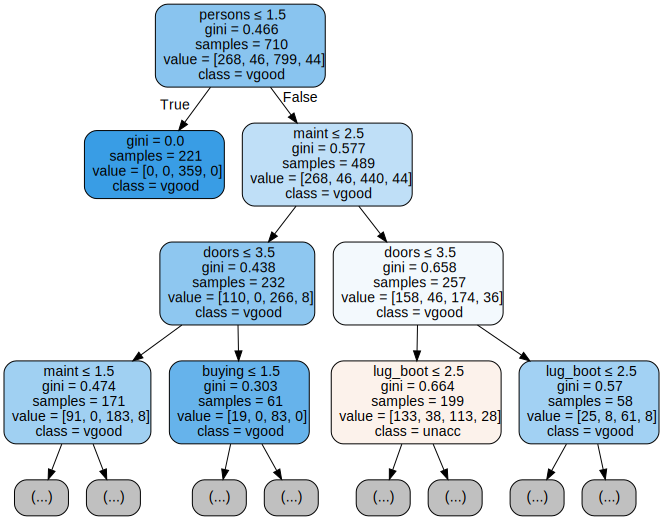

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

tree_index = 1

# Get the tree from the Random Forest
tree_to_visualize = rfc_100.estimators_[tree_index]

# Export the tree to graphviz format with max_depth set to 3
dot_data = export_graphviz(tree_to_visualize, out_file=None,
                           feature_names=X_train.columns,
                           class_names=df['class'].unique(),
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=3)  # Set max_depth to limit the depth of the visualization

# Create a graph from the graphviz format
graph = graphviz.Source(dot_data)

# Render the graph
graph.render(filename=f'tree_{tree_index}_small', format='png', cleanup=True)

# Display the graph
graph

##Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[116   6   5   0]
 [  1  13   2   2]
 [  7   0 392   0]
 [  4   3   0  19]]


##Confusion matrix visualization

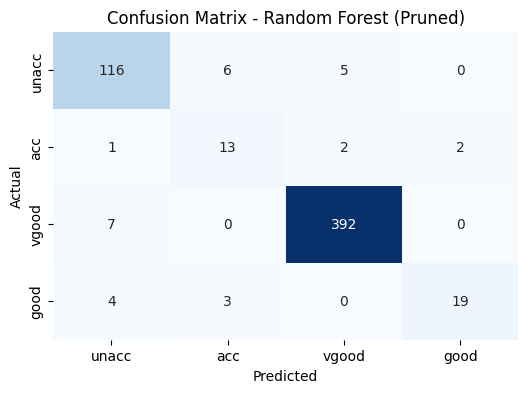

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming cm is the confusion matrix obtained using sklearn
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.title('Confusion Matrix - Random Forest (Pruned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.91      0.91      0.91       127
        good       0.59      0.72      0.65        18
       unacc       0.98      0.98      0.98       399
       vgood       0.90      0.73      0.81        26

    accuracy                           0.95       570
   macro avg       0.85      0.84      0.84       570
weighted avg       0.95      0.95      0.95       570



## Classification Report Visualization

<Figure size 800x600 with 0 Axes>

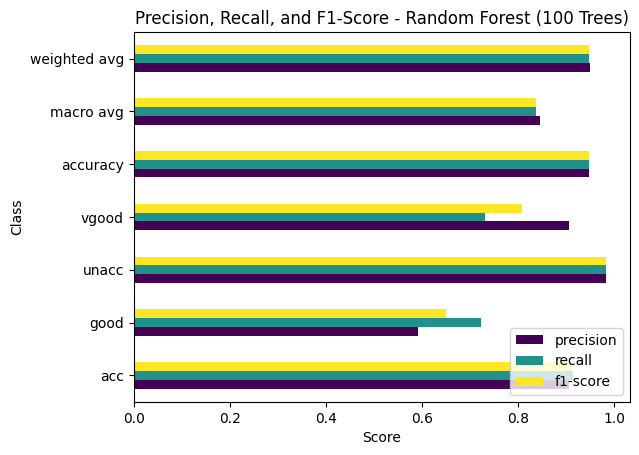

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test and y_pred are your true and predicted labels
classification_rep = classification_report(y_test, y_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(8, 6))
classification_df[['precision', 'recall', 'f1-score']].plot(kind='barh', cmap='viridis')
plt.title('Precision, Recall, and F1-Score - Random Forest (100 Trees)')
plt.xlabel('Score')
plt.ylabel('Class')
plt.legend(loc='lower right')
plt.show()


#**7. Making Predictions**

In [ ]:
# Expected output is unacc
y_pred = rfc_100.predict(X_test)[0]
y_pred

'unacc'

In [ ]:
# Expected output is acc
y_pred = clf_en.predict(X_test)[234]
y_pred

'acc'

Both predictions were accurate

#**8. Conclusion**

In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees.

The model accuracy score with 10 decision-trees is 0.9474 but the same with 100 decision-trees is 0.9649. So, as expected accuracy increases with number of decision-trees in the model.

Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance

#**9. Overall Conclusion**

In conclusion, our machine learning project focused on car evaluation using both the Decision Tree Classifier (DTC) and the Random Forest Classifier (RFC). We commenced by meticulously exploring the dataset, preparing the data through feature engineering, and subsequently splitting it into training and test sets. Employing the DTC, we observed commendable accuracy, with the model providing valuable insights into car safety predictions.

Transitioning to the RFC, we anticipated an enhancement in accuracy due to its ensemble nature, combining multiple decision trees. As expected, the RFC outperformed the DTC, achieving higher accuracy scores with varying numbers of decision trees. The use of 100 decision trees in the RFC demonstrated the best performance, reaching an accuracy of 96.49%. This improvement can be attributed to the Random Forest's ability to mitigate overfitting and increase the robustness of predictions by aggregating results from diverse trees.

In summary, while both the DTC and RFC proved effective, the Random Forest Classifier, particularly with a larger number of decision trees, emerged as the superior model in our car evaluation project, offering enhanced accuracy and predictive capabilities.